In [5]:
#!/usr/bin/python
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import StratifiedShuffleSplit
#from feature_format import featureFormat, targetFeatureSplit

from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data
from time import time

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
df= pd.DataFrame(data_dict)
POI_count = 0
name_list = data_dict.keys()
for person in name_list:
    POI_count += data_dict[person]['poi']    
print('Number of flagged Persons of Interest: %d' % POI_count)
print("Number of features per person: %d"%len(list(data_dict.values())[0]))
print('Number of people without POI flag: %d' % (len(name_list) - POI_count))
print('Total Number of people: %d' % len(df.keys()))
#print("Number of features per person: %d"%len(list(data_dict[person].count))
total_index = data_dict.keys().index("TOTAL")
print "Number of  ", (total_index), "Total index"
travel_index = data_dict.keys().index("THE TRAVEL AGENCY IN THE PARK")
print "Number of ", (travel_index), "travel agency in the park"
print "LOCKHART EUGENE E ", data_dict['LOCKHART EUGENE E']

Number of flagged Persons of Interest: 18
Number of features per person: 21
Number of people without POI flag: 128
Total Number of people: 146
Number of   104 Total index
Number of  101 travel agency in the park
LOCKHART EUGENE E  {'salary': 'NaN', 'to_messages': 'NaN', 'deferral_payments': 'NaN', 'total_payments': 'NaN', 'exercised_stock_options': 'NaN', 'bonus': 'NaN', 'restricted_stock': 'NaN', 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 'NaN', 'expenses': 'NaN', 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 'NaN', 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'NaN', 'from_poi_to_this_person': 'NaN'}


In [6]:
### from the dataset removed, also I correct the outliers with the pdf value.
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['deferral_payments'] = 0
data_dict['BELFER ROBERT']['expenses'] = 3285
data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['total_payments'] = 3285
data_dict['BELFER ROBERT']['exercised_stock_options'] = 0
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = 0

data_dict['BHATNAGAR SANJAY']['other'] = 0
data_dict['BHATNAGAR SANJAY']['expenses'] = 137864
data_dict['BHATNAGAR SANJAY']['director_fees'] = 0
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864
data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290

### Task 2: Remove outliers
data_dict.pop('TOTAL', 0)
data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0)
data_dict.pop('LOCKHART EUGENE E')

data = featureFormat(data_dict, features_list) 

### remove NAN's from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
### print top 4 salaries
print outliers_final

for name in outliers_final:
    if data_dict[name[0]]['poi'] ==1:
        print name[0]
        
import csv
df.to_csv('enron_data.csv')


[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]
SKILLING JEFFREY K
LAY KENNETH L


In [7]:
# Convert to numpy nan
df.replace(to_replace='NaN', value=np.nan, inplace=True)

# Count number of NaN's for columns
print df.isnull().sum()

# DataFrame dimeansion
print df.shape

nandf = df.isnull().sum()


ALLEN PHILLIP K                   2
BADUM JAMES P                    15
BANNANTINE JAMES M                5
BAXTER JOHN C                     9
BAY FRANKLIN R                    9
BAZELIDES PHILIP J               13
BECK SALLY W                      7
BELDEN TIMOTHY N                  4
BELFER ROBERT                    14
BERBERIAN DAVID                  13
BERGSIEKER RICHARD P              5
BHATNAGAR SANJAY                  8
BIBI PHILIPPE A                   5
BLACHMAN JEREMY M                 5
BLAKE JR. NORMAN P               16
BOWEN JR RAYMOND M                5
BROWN MICHAEL                    12
BUCHANAN HAROLD G                 5
BUTTS ROBERT H                   10
BUY RICHARD B                     4
CALGER CHRISTOPHER F              5
CARTER REBECCA C                  6
CAUSEY RICHARD A                  5
CHAN RONNIE                      16
CHRISTODOULOU DIOMEDES           16
CLINE KENNETH W                  17
COLWELL WESLEY                    5
CORDES WILLIAM R            

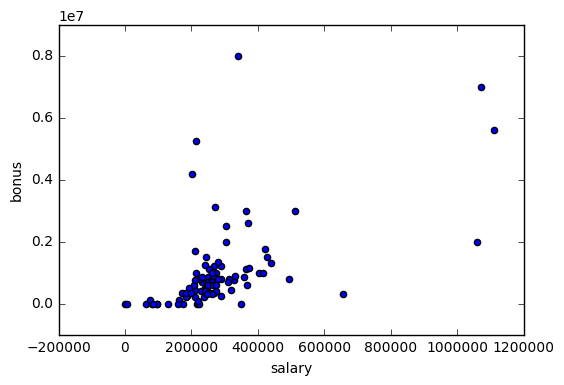

In [8]:
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [9]:
features_list = ["poi", "salary", "bonus",'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(data_dict, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"



importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

accuracy 0.866666666667
Decision tree algorithm time: 0.01 s
Feature Ranking: 
1 feature salary (0.19722995884)
2 feature bonus (0.189313620185)
3 feature deferral_payments (0.174704624973)
4 feature total_payments (0.151335953699)
5 feature loan_advances (0.146492104387)
6 feature restricted_stock_deferred (0.128893662728)
7 feature deferred_income (0.012030075188)
8 feature total_stock_value (0.0)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)


In [12]:
features_list = ["poi", "salary", "bonus",'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(data_dict, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

accuracy 0.733333333333
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.215235391175)
2 feature bonus (0.189313620185)
3 feature deferral_payments (0.163810887764)
4 feature total_payments (0.163366028887)
5 feature loan_advances (0.143762958004)
6 feature restricted_stock_deferred (0.0710441131494)
7 feature deferred_income (0.0534670008354)
8 feature total_stock_value (0.0)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)


In [14]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
poi_sender_fract=dict_to_list("from_poi_to_this_person","to_messages")
poi_recipient_fract=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["poi_sender_fract"]=poi_sender_fract[count]
    data_dict[i]["poi_recipient_fract"]=poi_recipient_fract[count]
    count +=1

    
features_list = ["poi", "poi_sender_fract", "poi_recipient_fract"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()

error: key  poi_sender_fract  not present


TypeError: 'NoneType' object is not iterable

In [13]:
my_features = features_list + [
'shared_receipt_with_poi',
'expenses',
'loan_advances',
'long_term_incentive',
'other',
 'restricted_stock',
'restricted_stock_deferred',
'deferral_payments',
 'deferred_income',
'salary',
'total_stock_value',
'exercised_stock_options',
'total_payments',
'bonus']


features_list = ["poi", "salary", "bonus", "poi_sender_fract", "poi_recipient_fract",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(data_dict, features_list)

labels, features = targetFeatureSplit(data)

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

k_best = SelectKBest(k=10)
k_best.fit(features, labels)

results_list = zip(k_best.get_support(), my_features[1:], k_best.scores_)
results_list = sorted(results_list, key=lambda x: x[2], reverse=True)
print "K-best features:", results_list

## 5 best features chosen by SelectKBest
my_features = features_list + ['exercised_stock_options',
'total_stock_value',
'bonus',
 'salary',
'poi_sender_fract']

data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

error: key  poi_sender_fract  not present


TypeError: 'NoneType' object is not iterable

In [ ]:
features_list = ["poi", "poi_sender_fract", "poi_recipient_fract", "shared_receipt_with_poi"]
### try Naive Bayes for prediction
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
scores = sklearn.cross_validation.cross_val_score(clf, features, labels)
print 'GaussianN', scores
print 'accuracy',accuracy
print "NB algorithm time:", round(time()-t0, 3), "s"

In [2]:

rf_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(rf_clf, features, labels)
accuracy = accuracy_score(pred,labels_test)
print 'RandomForestClassifier', scores
print 'accuracy', accuracy
print "RF algorithm time:", round(time()-t0, 3), "s"

NameError: name 'features' is not defined

In [3]:
clf = AdaBoostClassifier(n_estimators=100)
scores = sklearn.cross_validation.cross_val_score(clf, features, labels)
accuracy = accuracy_score(pred,labels_test)
print 'AdaBoostClassifier', scores 
print 'accuracy', accuracy
print "ABC algorithm time:", round(time()-t0, 3), "s"

NameError: name 'features' is not defined

In [4]:
def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    #Added min max scaler here
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler()
    features = min_max_scaler.fit_transform(features)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            else:
                true_positives += 1
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    pickle.dump(clf, open(CLF_PICKLE_FILENAME, "w") )
    pickle.dump(dataset, open(DATASET_PICKLE_FILENAME, "w") )
    pickle.dump(feature_list, open(FEATURE_LIST_FILENAME, "w") )

def load_classifier_and_data():
    clf = pickle.load(open(CLF_PICKLE_FILENAME, "r") )
    dataset = pickle.load(open(DATASET_PICKLE_FILENAME, "r") )
    feature_list = pickle.load(open(FEATURE_LIST_FILENAME, "r"))
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()

NameError: global name 'pickle' is not defined

In [37]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
#features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']
features_list = ["poi", "poi_sender_fract", "poi_recipient_fract", "shared_receipt_with_poi"]

### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]


t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)

print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives

print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy before tuning  0.857142857143
Decision tree algorithm time: 0.001 s
done in 0.001s
Validating algorithm:
accuracy after tuning =  0.892857142857
precision =  0.5
recall =  0.666666666667


In [15]:

# coding: utf-8


#!/usr/bin/python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import StratifiedShuffleSplit

from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB

import sys
import pickle
sys.path.append("../tools/")

from tester import test_classifier, dump_classifier_and_data


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ["poi", "salary", "bonus",'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
df= pd.DataFrame(data_dict)
POI_count = 0
name_list = data_dict.keys()
for person in name_list:
    POI_count += data_dict[person]['poi']    

### from the dataset removed, also I correct the outliers with the pdf value.
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['deferral_payments'] = 0
data_dict['BELFER ROBERT']['expenses'] = 3285
data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['total_payments'] = 3285
data_dict['BELFER ROBERT']['exercised_stock_options'] = 0
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = 0

data_dict['BHATNAGAR SANJAY']['other'] = 0
data_dict['BHATNAGAR SANJAY']['expenses'] = 137864
data_dict['BHATNAGAR SANJAY']['director_fees'] = 0
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864
data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290

### Task 2: Remove outliers
data_dict.pop('TOTAL', 0)
data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0)
data_dict.pop('LOCKHART EUGENE E')

data = featureFormat(data_dict, features_list) 
labels, features = targetFeatureSplit(data)


### remove NAN's from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
### print top 4 salaries

# Convert to numpy nan
df.replace(to_replace='NaN', value=np.nan, inplace=True)




### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"



importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])


# In[23]:

features_list = ["poi", "salary", "bonus",'deferral_payments','poi_sender_fract','poi_recipient_fract', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(data_dict, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])


# In[12]:

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
poi_sender_fract=dict_to_list("from_poi_to_this_person","to_messages")
poi_recipient_fract=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["poi_sender_fract"]=poi_sender_fract[count]
    data_dict[i]["poi_recipient_fract"]=poi_recipient_fract[count]
    count +=1

    
features_list = ["poi", "poi_sender_fract", "poi_recipient_fract"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()


# In[35]:

my_features = features_list + [
'shared_receipt_with_poi',
'expenses',
'loan_advances',
'long_term_incentive',
'other',
 'restricted_stock',
'restricted_stock_deferred',
'deferral_payments',
 'deferred_income',
'salary',
'total_stock_value',
'exercised_stock_options',
'total_payments',
'bonus']


features_list = ["poi", "salary", "bonus", "poi_sender_fract", "poi_recipient_fract",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(data_dict, features_list)

labels, features = targetFeatureSplit(data)

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

k_best = SelectKBest(k=10)
k_best.fit(features, labels)

results_list = zip(k_best.get_support(), my_features[1:], k_best.scores_)
results_list = sorted(results_list, key=lambda x: x[2], reverse=True)
print "K-best features:", results_list

## 5 best features chosen by SelectKBest
my_features = features_list + ['exercised_stock_options',
'total_stock_value',
'bonus',
 'salary',
'poi_sender_fract']

data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)


# In[45]:

features_list = ["poi", "poi_sender_fract", "poi_recipient_fract", "shared_receipt_with_poi"]
### try Naive Bayes for prediction
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
scores = sklearn.cross_validation.cross_val_score(clf, features, labels)
print 'GaussianN', scores
print 'accuracy',accuracy
print "NB algorithm time:", round(time()-t0, 3), "s"


# In[46]:


rf_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(rf_clf, features, labels)
accuracy = accuracy_score(pred,labels_test)
print 'RandomForestClassifier', scores
print 'accuracy', accuracy
print "RF algorithm time:", round(time()-t0, 3), "s"


# In[47]:

clf = AdaBoostClassifier(n_estimators=100)
scores = sklearn.cross_validation.cross_val_score(clf, features, labels)
accuracy = accuracy_score(pred,labels_test)
print 'AdaBoostClassifier', scores 
print 'accuracy', accuracy
print "ABC algorithm time:", round(time()-t0, 3), "s"


# In[36]:

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    #Added min max scaler here
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler()
    features = min_max_scaler.fit_transform(features)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            else:
                true_positives += 1
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    pickle.dump(clf, open(CLF_PICKLE_FILENAME, "w") )
    pickle.dump(dataset, open(DATASET_PICKLE_FILENAME, "w") )
    pickle.dump(feature_list, open(FEATURE_LIST_FILENAME, "w") )

def load_classifier_and_data():
    clf = pickle.load(open(CLF_PICKLE_FILENAME, "r") )
    dataset = pickle.load(open(DATASET_PICKLE_FILENAME, "r") )
    feature_list = pickle.load(open(FEATURE_LIST_FILENAME, "r"))
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


# In[37]:

### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
#features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']
features_list = ["poi", "poi_sender_fract", "poi_recipient_fract", "shared_receipt_with_poi"]

### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]


t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)

print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives

print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )


# In[ ]:





accuracy 0.8
Decision tree algorithm time: 0.001 s
Feature Ranking: 
1 feature salary (0.189313620185)
2 feature bonus (0.174704624973)
3 feature deferral_payments (0.151335953699)
4 feature total_payments (0.146492104387)
5 feature loan_advances (0.143762958004)
6 feature restricted_stock_deferred (0.122210287624)
7 feature deferred_income (0.0601503759398)
8 feature total_stock_value (0.012030075188)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)
error: key  poi_sender_fract  not present


TypeError: 'NoneType' object is not iterable

In [16]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit